In [1]:
import tensorflow as tf

print(f"Tensorflow version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

Tensorflow version: 2.7.0
Keras Version: 2.7.0
GPU is available


In [2]:
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.layers import Dropout, Dense, Conv2D, MaxPooling2D
from tensorflow.keras import utils, optimizers

Делим наш датасет на обучающую и тестовую выборку

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

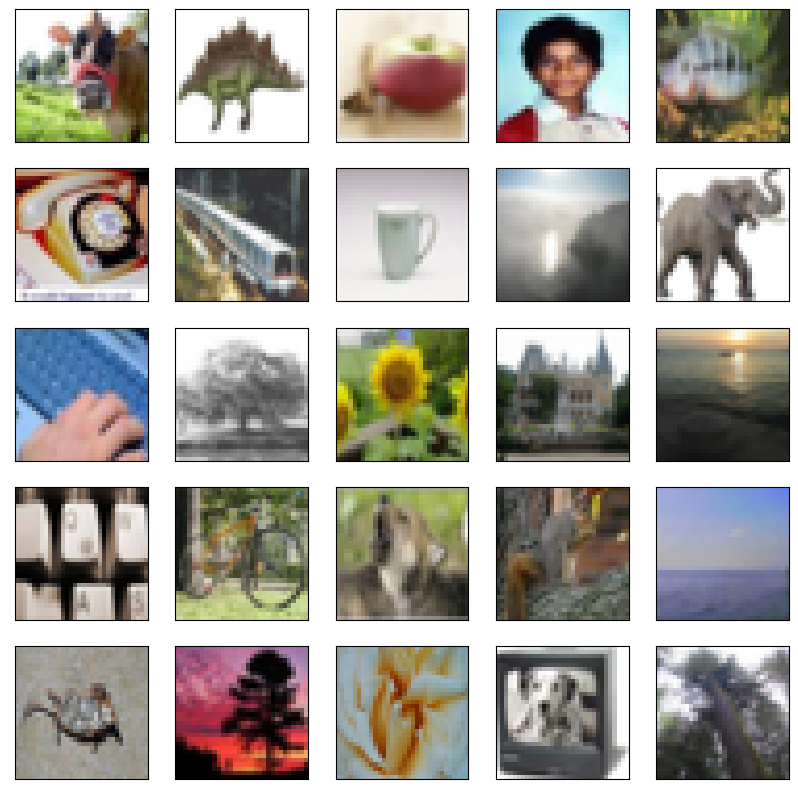

In [4]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

In [5]:
print('train_images: ', train_images.shape)
print('test_images: ', test_images.shape)
print('train_labels: ', train_labels.shape)
print('test_labels: ', test_labels.shape)

train_images:  (50000, 32, 32, 3)
test_images:  (10000, 32, 32, 3)
train_labels:  (50000, 1)
test_labels:  (10000, 1)


Нормализация данных

In [6]:
train_labels = utils.to_categorical(train_labels, 100)
test_labels = utils.to_categorical(test_labels, 100)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images = train_images / 255
test_images = test_images / 255

создание модели нейронной сети

In [7]:
from tensorflow.keras import layers

inputs = keras.Input(shape=(32, 32, 3))
x = Conv2D(32, 3, activation="relu")(inputs)
x = Conv2D(64, 3, activation="relu")(x)
block_1_output = MaxPooling2D(3)(x)
x = Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])
x = Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])
x = Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
outputs = Dense(100, activation='softmax')(x)

model = keras.Model(inputs, outputs, name="cifar100")

model.summary()

Model: "cifar100"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 30, 30, 32)   896         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 28, 28, 64)   18496       ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 9, 9, 64)     0           ['conv2d_1[0][0]']               
                                                                                           

Компиляция модели

In [8]:
model.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Обучение модели

In [9]:
epochs = 50
batch_size = 64

hist = model.fit(train_images, train_labels, batch_size=batch_size, validation_data=(test_images, test_labels),
                 epochs=epochs)
print(hist.history)

Epoch 1/50
782/782 [==============================] - 23s 16ms/step - loss: 4.2602 - accuracy: 0.0379 - val_loss: 3.8397 - val_accuracy: 0.0922
Epoch 2/50
782/782 [==============================] - 20s 26ms/step - loss: 3.7595 - accuracy: 0.1053 - val_loss: 3.4661 - val_accuracy: 0.1613
Epoch 3/50
782/782 [==============================] - 20s 26ms/step - loss: 3.4818 - accuracy: 0.1518 - val_loss: 3.2879 - val_accuracy: 0.1937
Epoch 4/50
782/782 [==============================] - 20s 26ms/step - loss: 3.2496 - accuracy: 0.1938 - val_loss: 3.0885 - val_accuracy: 0.2315
Epoch 5/50
782/782 [==============================] - 20s 26ms/step - loss: 3.0466 - accuracy: 0.2327 - val_loss: 2.8767 - val_accuracy: 0.2698
Epoch 6/50
782/782 [==============================] - 18s 23ms/step - loss: 2.8817 - accuracy: 0.2647 - val_loss: 2.7644 - val_accuracy: 0.2923
Epoch 7/50
782/782 [==============================] - 5s 7ms/step - loss: 2.7433 - accuracy: 0.2910 - val_loss: 2.6746 - val_accuracy: 0

Проверка точности предсказания

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 2.9950 - accuracy: 0.4004


Графики

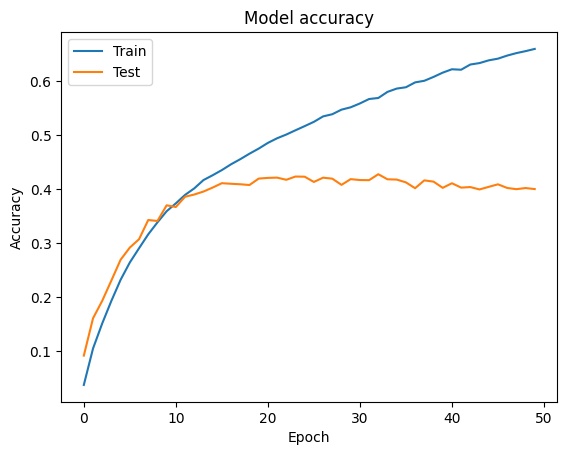

In [11]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

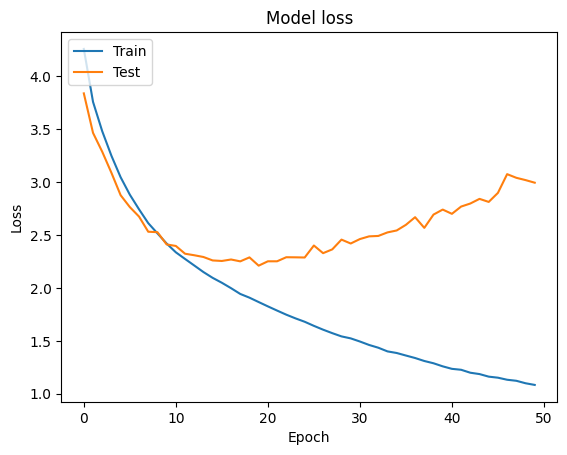

None


In [12]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
print(plt.show())